<a href="https://colab.research.google.com/github/saketkc/pyFLGLM/blob/master/Chapters/04_Chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 4 - Generalized Linear Models: Model Fitting and Inference

In [ ]:
import warnings

import pandas as pd
import proplot as plot
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from scipy import stats

warnings.filterwarnings("ignore")
%pylab inline


plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"

Populating the interactive namespace from numpy and matplotlib


In [ ]:
crabs_df = pd.read_csv("../data/Crabs.tsv.gz", sep="\t")
crabs_df.head()

,crab,y,weight,width,color,spine
1,1,8,3.05,28.3,2,3
2,2,0,1.55,22.5,3,3
3,3,9,2.30,26.0,1,1
4,4,0,2.10,24.8,3,3
5,5,4,2.60,26.0,3,3


In [ ]:
formula = """y ~ width"""
response, predictors = dmatrices(formula, crabs_df, return_type="dataframe")
fit = sm.GLM(
    response, predictors, family=sm.families.Poisson(link=sm.families.links.log())
).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Tue, 23 Jun 2020   Deviance:                       567.88
Time:                        00:47:28   Pearson chi2:                     544.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3048      0.542     -6.095      0.0

In [ ]:
formula = """y ~ weight + width"""
response, predictors = dmatrices(formula, crabs_df, return_type="dataframe")
fit = sm.GLM(
    response, predictors, family=sm.families.Poisson(link=sm.families.links.log())
).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -457.60
Date:                Tue, 23 Jun 2020   Deviance:                       559.90
Time:                        00:47:28   Pearson chi2:                     537.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2952      0.899     -1.441      0.1

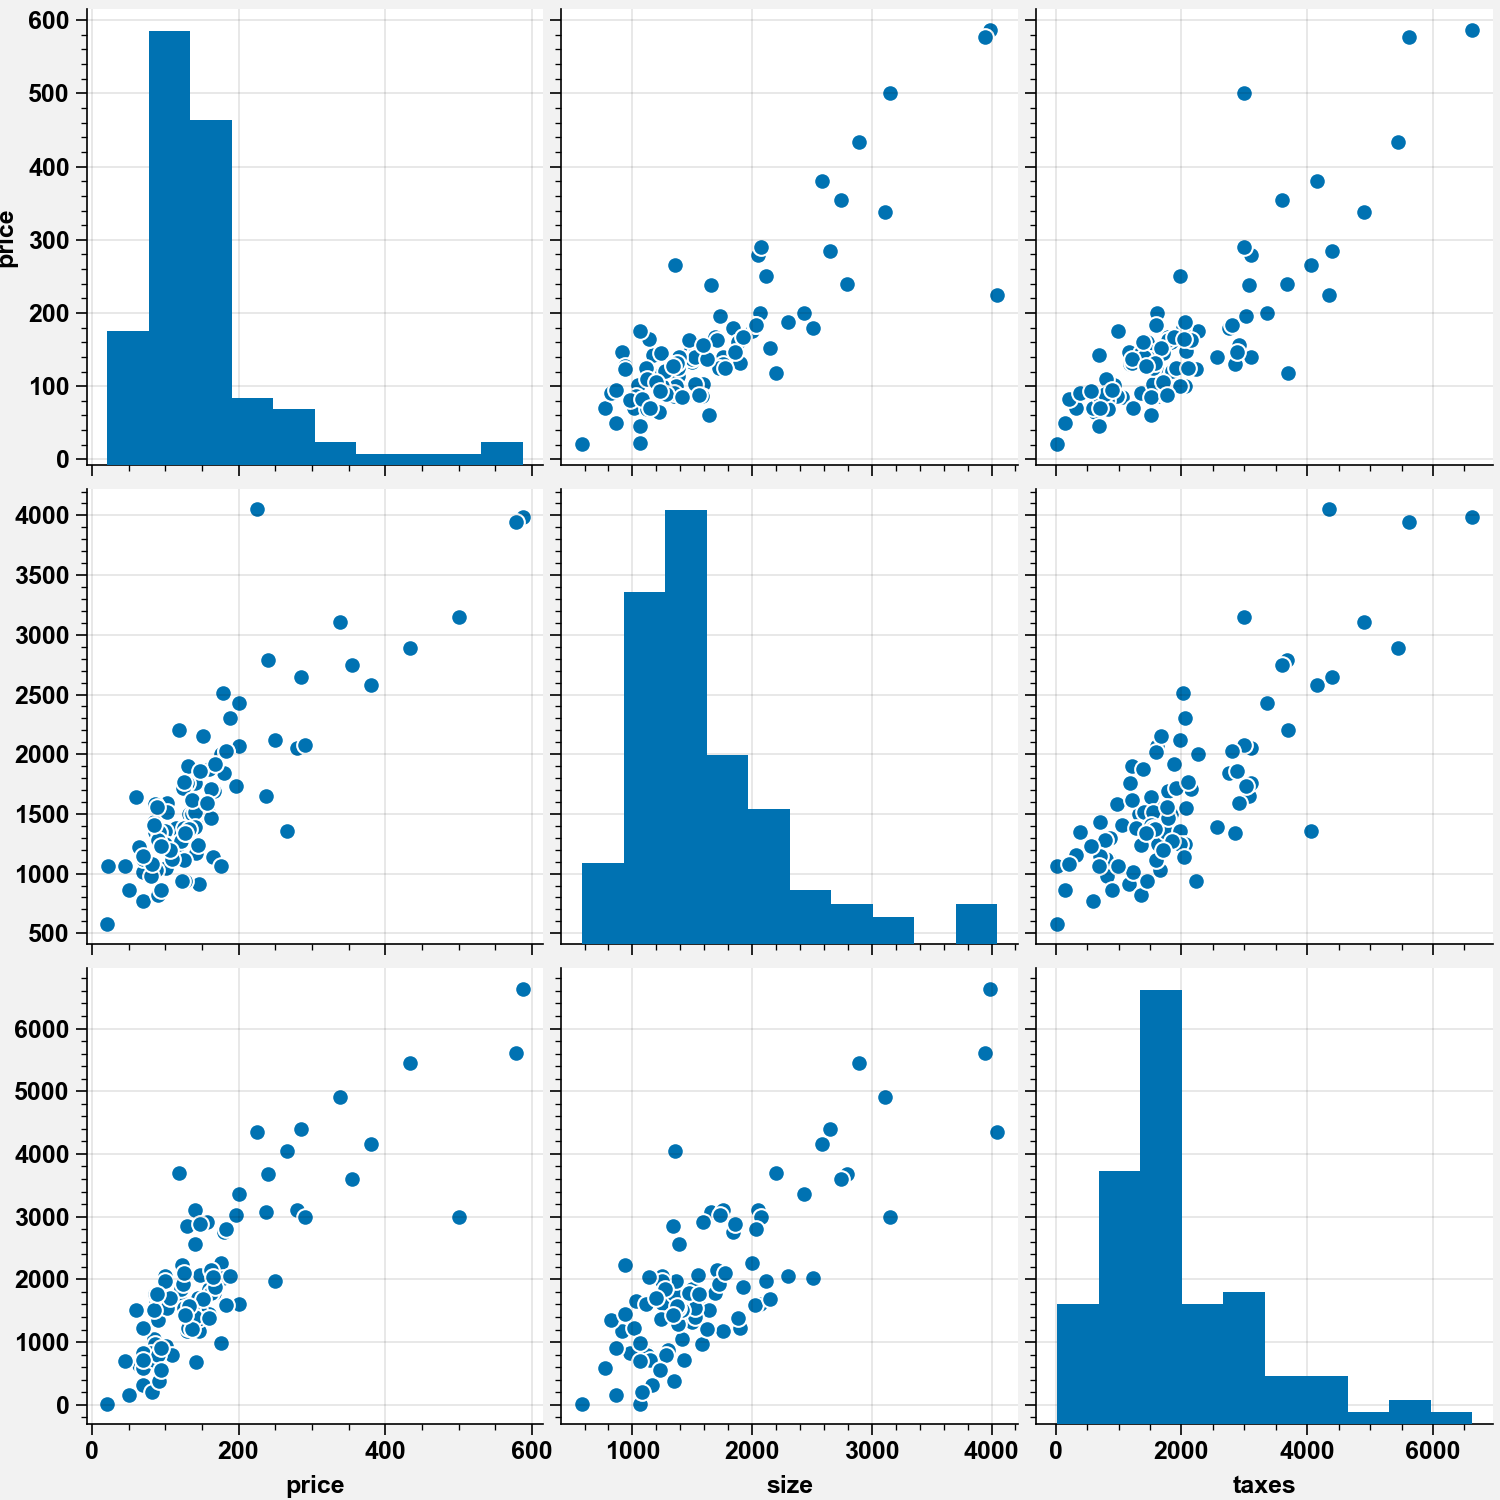

In [ ]:
house_df = pd.read_csv("../data/Houses.tsv.gz", sep="\t")
sns.pairplot(house_df[["price", "size", "taxes"]])

In [ ]:
from statsmodels.stats.anova import anova_lm

fit1 = smf.ols(formula="""price ~ size + new + baths + beds""", data=house_df).fit()
fit2 = smf.ols(
    formula="""price ~ (size + new + baths + beds)**2""", data=house_df
).fit()
fit3 = smf.ols(
    formula="""price ~ (size + new + baths + beds)**3""", data=house_df
).fit()
fit6 = smf.ols(
    formula="""price ~ (size + new + baths + beds)**6""", data=house_df
).fit()

anova_results = anova_lm(fit1, fit2)
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,95.0,279624.077203,0.0,NaN,NaN,NaN
1,89.0,217916.368647,6.0,61707.708555,4.200377,0.000913


In [ ]:
anova_results = anova_lm(fit2, fit1)
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,89.0,217916.368647,0.0,NaN,NaN,NaN
1,95.0,279624.077203,-6.0,-61707.708555,3.494115,NaN


In [ ]:
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,89.0,217916.368647,0.0,NaN,NaN,NaN
1,95.0,279624.077203,-6.0,-61707.708555,3.494115,NaN


In [ ]:
print(fit6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     24.85
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           3.27e-24
Time:                        00:47:30   Log-Likelihood:                -521.77
No. Observations:                 100   AIC:                             1074.
Df Residuals:                      85   BIC:                             1113.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -195.2928    

### Gamma GLMs for House Selling Price Data

In [ ]:
formula = """price ~ size + new + beds + size:new + size:beds"""

response, predictors = dmatrices(formula, house_df, return_type="dataframe")
fit = sm.GLM(
    response, predictors, family=sm.families.Gamma(link=sm.families.links.identity())
).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       94
Model Family:                   Gamma   Df Model:                            5
Link Function:               identity   Scale:                         0.10951
Method:                          IRLS   Log-Likelihood:                -517.66
Date:                Tue, 23 Jun 2020   Deviance:                       10.263
Time:                        00:47:30   Pearson chi2:                     10.3
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.3850     48.599      0.913      0.3

In [ ]:
formula = """price ~ size + new + baths + beds"""
response, predictors = dmatrices(formula, house_df, return_type="dataframe")
fit_g1 = sm.GLM(
    response, predictors, family=sm.families.Gamma(link=sm.families.links.identity())
).fit()

formula = """price ~ (size + new + baths + beds)**2"""
response, predictors = dmatrices(formula, house_df, return_type="dataframe")
fit_g2 = sm.GLM(
    response, predictors, family=sm.families.Gamma(link=sm.families.links.identity())
).fit()


def anova_glm(model1, model2):

    # Source: https://static1.squarespace.com/static/58332d815016e1b4077fe29f/t/5d3f1d90ed639e00011487c8/1564417425253/5.2_GLM+-+Comparing+Models-+F+Test+-+Errata.pdf
    df_numerator = model2.df_model - model1.df_model
    f_stat = (model1.deviance - model2.deviance) / (df_numerator * model2.scale)
    df_denominator = model2.fittedvalues.shape[0] - model1.df_model
    p_value = stats.f.sf(f_stat, df_numerator, df_denominator)
    names = ["df_resid", "resid_deviance", "df_diff", "deviance", "F", "Pr(>F)"]
    data = []
    data.append((model1.df_resid, model1.deviance, " ", " ", " ", " "))
    data.append(
        (
            model2.df_resid,
            model2.deviance,
            df_numerator,
            model2.deviance,
            f_stat,
            p_value,
        )
    )
    return pd.DataFrame(data, columns=names)


anova_results = anova_glm(fit_g1, fit_g2)
print(anova_results)

   df_resid  resid_deviance df_diff deviance         F    Pr(>F)
0        95       10.441719                                     
1        89        9.872775       6  9.87278  0.843782  0.539286


### TODO: Fix the anova_glm output 

In [ ]:
formula = """price ~ size + new + size:new"""
response, predictors = dmatrices(formula, house_df, return_type="dataframe")
fit = sm.GLM(
    response, predictors, family=sm.families.Gamma(link=sm.families.links.identity())
).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                   Gamma   Df Model:                            3
Link Function:               identity   Scale:                         0.11020
Method:                          IRLS   Log-Likelihood:                -519.05
Date:                Tue, 23 Jun 2020   Deviance:                       10.563
Time:                        00:47:30   Pearson chi2:                     10.6
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4509     12.974     -0.574      0.5

In [ ]:
formula = """price ~ size + new + size:new"""
response, predictors = dmatrices(formula, house_df, return_type="dataframe")
fit = sm.GLM(
    response, predictors, family=sm.families.Gaussian(link=sm.families.links.identity())
).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          2703.8
Method:                          IRLS   Log-Likelihood:                -534.97
Date:                Tue, 23 Jun 2020   Deviance:                   2.5957e+05
Time:                        00:47:30   Pearson chi2:                 2.60e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2278     15.521     -1.432      0.1

In [ ]:
formula = """price ~ size + new + size:new"""
response, predictors = dmatrices(formula, house_df, return_type="dataframe")
fit = sm.GLM(
    response, predictors, family=sm.families.Gaussian(link=sm.families.links.identity())
).fit()
print(fit.aic)

1077.9469818936216


In [ ]:
formula = """price ~ size + new + beds + baths + size:new + size:beds + new:baths"""
response, predictors = dmatrices(formula, house_df, return_type="dataframe")
fit = sm.GLM(
    response, predictors, family=sm.families.Gaussian(link=sm.families.links.identity())
).fit()
print(fit.aic)

1068.5650280217183
